### 1. Download the data from the above link. How many ".csv" files are available in the dataset?

- links, movies, ratings and tags are the **4** ".csv" files available in the given dataset

In [1]:
import pandas as pd

### 2. What is the shape of "movies.csv"?

In [2]:
movies_df = pd.read_csv('movies.csv')
movies_shape = movies_df.shape
movies_shape

(9742, 3)

In [23]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 3. What is the shape of "ratings.csv"?


In [3]:
ratings_df = pd.read_csv('ratings.csv')
ratings_shape = ratings_df.shape
ratings_shape

(100836, 4)

### 4. How many unique "userId" are available in "ratings.csv"?

In [4]:
unique_users = ratings_df['userId'].nunique()
unique_users

610

### 5. Which movie has recieved maximum number of user ratings?

In [5]:
movie_ratings_count = ratings_df.groupby('movieId')['rating'].count()
max_rated_movie_id = movie_ratings_count.idxmax()

In [8]:
most_rated_movie = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].values[0]
most_rated_movie

'Forrest Gump (1994)'

### 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [9]:
tags_df = pd.read_csv('tags.csv')


In [10]:
matrix_movie_id = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId'].values[0]

In [11]:
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()
matrix_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [12]:
terminator_movie_id = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]
terminator_avg_rating = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].mean()
terminator_avg_rating

3.970982142857143

### 8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

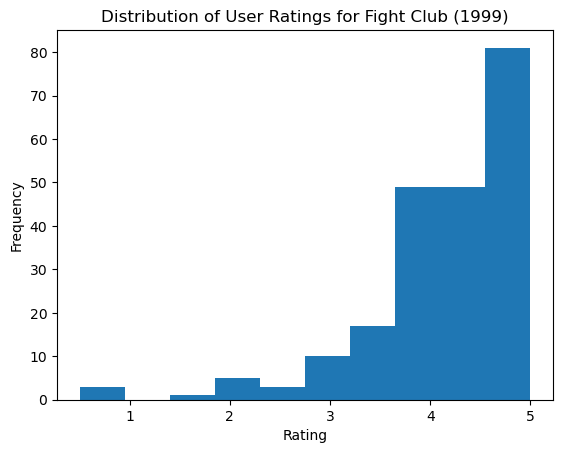

In [13]:
import matplotlib.pyplot as plt

fight_club_movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Plot histogram
plt.hist(fight_club_ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.show()

- It is a Left skewed distribution

## Mandatory Operations

### 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 

In [14]:
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['rating_count', 'rating_mean']

### 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.

In [15]:
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId')

### 3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [16]:
popular_movies_df = merged_df[merged_df['rating_count'] > 50]

In [17]:
popular_movies_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### 9. Which movie is the most popular based on  average user ratings?

Answer this question only after applying the above mentioned "Mandatory Operration".

In [18]:
most_popular_movie = popular_movies_df.loc[popular_movies_df['rating_mean'].idxmax(), 'title']
most_popular_movie

'Shawshank Redemption, The (1994)'

### 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

Answer this question only after applying the above mentioned "Mandatory Operration".

In [19]:
top_5_movies = popular_movies_df.nlargest(5, 'rating_count')['title'].values
top_5_movies

array(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'], dtype=object)

### 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [20]:
sci_fi_movies = popular_movies_df[popular_movies_df['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[2]['title']
third_most_popular_sci_fi

'Jurassic Park (1993)'

## Web Scraping

In [21]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 iZlgcd'})
    return imdb_rating.text if imdb_rating else np.nan

In [22]:
popular_movies_df['imdb_rating'] = popular_movies_df['imdbId'].apply(scrapper)
highest_imdb_rating_movie_id = popular_movies_df.loc[popular_movies_df['imdb_rating'].idxmax(), 'movieId']
highest_imdb_rating_movie_id


KeyError: 'imdbId'

In [24]:
links_df = pd.read_csv('links.csv')

In [25]:
merged_popular_movies_df = pd.merge(popular_movies_df, links_df[['movieId', 'imdbId']], on='movieId', how='inner')

In [26]:
merged_popular_movies_df['imdb_rating'] = merged_popular_movies_df['imdbId'].apply(scrapper)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))